# **Спектральная кластеризация**

Данный тип кластеризации использует **собственные значения (спектр) матрицы сходства данных**, чтобы снизить размерность данных и далее провести кластеризацию.

Более подробно со спектром вы познакомитесь, когда будете изучать линейную алгебру.

Алгоритм спектральной кластеризации состоит из **четырёх шагов**:

**1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.**

    Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

    Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:
    
![](https://lms.skillfactory.ru/assets/courseware/v1/895d149d3111a1207866f55733b316df/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_25.png)

**2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:**

![](https://lms.skillfactory.ru/assets/courseware/v1/6dd5b71a8571cd0fe7dfa314e480c3d8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_26.png)

**3. Далее уменьшаем размерность данных.**

    Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

![](https://lms.skillfactory.ru/assets/courseware/v1/bd55daf189af48779220fa4ba1dad809/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_27.png)

Теперь одна вершина описывается одним признаком.

**4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.**

    Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/971b3acde6719f444b515f38c9f1c486/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_28.png)

Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

***
## **ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ?**

Данный метод широко используется **для сегментации изображений**. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

![](https://lms.skillfactory.ru/assets/courseware/v1/06144a25eddf97a09132a4b461dc4cdd/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_29.png)

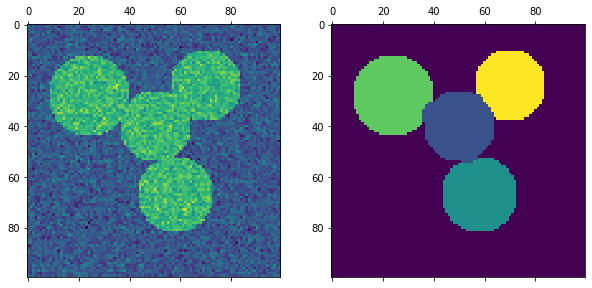

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

graph.data = np.exp(-graph.data / graph.data.std())

from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show() 

***
## **КАК ЗАПУСТИТЬ СПЕКТРАЛЬНУЮ КЛАСТЕРИЗАЦИЮ?**

Рассмотрим это на нашем примере датасета с покемонами:

In [2]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering

# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
X = df[['Attack', 'Defense']]

# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры **SpectralClustering**:

* **n_clusters** — количество кластеров; по умолчанию — 8.
* **random_state** — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

Визуализируем результаты:

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

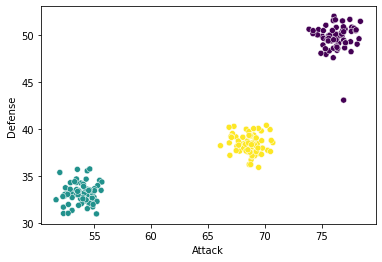

In [3]:
# импортируем seaborn для визуализации
import seaborn as sns
sns.scatterplot( df.Attack, df.Defense, c=spectral_predictions)

Для четырёх кластеров:

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

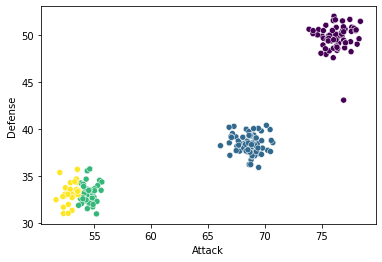

In [4]:
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

sns.scatterplot( df.Attack, df.Defense, c=spectral_predictions)

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, **не справляется с выбросами и не выделяет их в отдельный кластер**. К сожалению, этот недостаток алгоритма нельзя исправить.

***
## **ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ**

### **ПРЕИМУЩЕСТВА**

* Подходит для кластеризации данных с **большим количеством признаков**, так как использует технику понижения размерности.
* Эффективна для кластеризации **разрежённых данных**.
* Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

![](https://lms.skillfactory.ru/assets/courseware/v1/fb4dd3e3c7d751b63b1e610cbaf50d15/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_32.png)

Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

### **НЕДОСТАТКИ**

* Нужно **заранее задавать количество кластеров.**
* Подходит для задач сбалансированной классификации, то есть **количество точек между кластерами не сильно отличается.**